<a href="https://colab.research.google.com/github/nihalks-30/Language-Detection/blob/main/Language_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("basilb2s/language-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/language-detection


In [5]:
file_path = os.path.join(path, "Language Detection.csv")
df = pd.read_csv(file_path)
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [6]:
df.shape

(10337, 2)

In [7]:
df["Language"].value_counts()

,count
Language,
English,1385
French,1014
Spanish,819
Portugeese,739
Italian,698
Russian,692
Sweedish,676
Malayalam,594
Dutch,546


In [9]:
X = df["Text"]
y = df["Language"]

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
import re

text_list = []

for text in X:
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    text_list.append(text)


<ipython-input-13-c7f8c5868b73>:7: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(text_list).toarray()
X.shape

(10337, 34937)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [17]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [18]:
y_prediction = model.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_prediction)
confusion_m = confusion_matrix(y_test, y_prediction)

print("The accuracy is :",accuracy)

The accuracy is : 0.9787234042553191


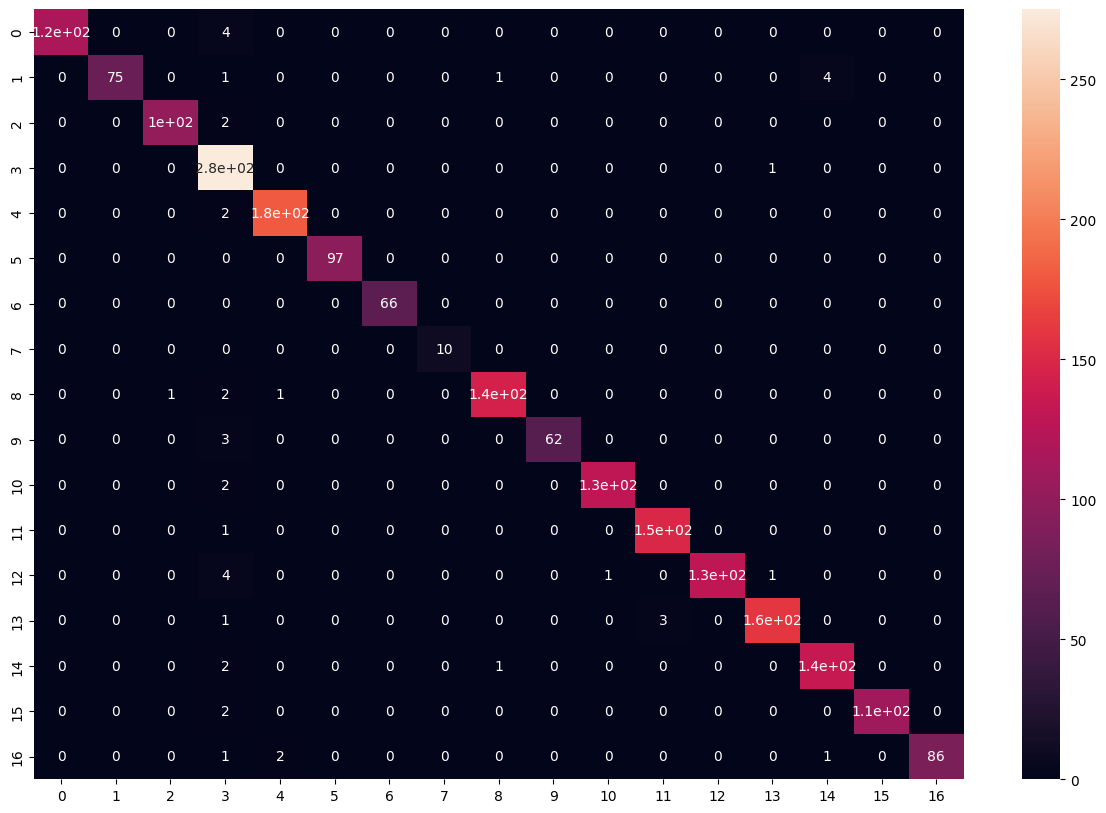

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_m, annot = True)
plt.show()

In [21]:
def lang_predict(text):
     x = cv.transform([text]).toarray()
     lang = model.predict(x)
     lang = le.inverse_transform(lang)
     print("The langauge is in",lang[0])

In [22]:
lang_predict("Today is going to be very busy because I have a lot of things to do.")


The langauge is in English


In [23]:
lang_predict("سيكون اليوم مشغولاً للغاية لأن لدي الكثير من الأشياء لأفعلها.")


The langauge is in Arabic


In [24]:
lang_predict("आज का दिन बहुत व्यस्त रहने वाला है क्योंकि मेरे पास करने के लिए बहुत कुछ है।")


The langauge is in Hindi


In [25]:
lang_predict("Сегодня будет очень занят, потому что у меня много дел.")


The langauge is in Russian


In [26]:
lang_predict("Hoy va a estar muy ocupado porque tengo muchas cosas que hacer.")


The langauge is in Spanish


In [27]:
lang_predict("Aujourd'hui va être très chargé car j'ai beaucoup de choses à faire.")


The langauge is in French


In [28]:
lang_predict("Heute wird es sehr anstrengend, weil ich viel zu tun habe.")


The langauge is in German


In [32]:
lang_predict("ഇന്ത്യയിലെ 22 ഷെഡ്യൂൾഡ് ഭാഷകളിൽ ഒന്നാണിത്")

The langauge is in Malayalam
